In [1]:
import tensorflow as tf

2023-11-24 16:27:16.015229: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-24 16:27:16.016588: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-24 16:27:16.020627: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-24 16:27:16.221955: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-24 16:27:17.781000: W tensorflow/compiler/

In [2]:
tf.config.list_physical_devices("GPU")

2023-11-24 16:27:20.443658: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-24 16:27:22.125893: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-24 16:27:22.254654: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import cv2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
import os
path = "./light_on_off/"
os.listdir(path)

['lightOFF.240.jpg',
 'lightOFF.530.jpg',
 'lightON.1073.jpg',
 'lightON.852.jpg',
 'lightOFF.80.jpg',
 'lightON.34.jpg',
 'lightOFF.576.jpg',
 'lightON.759.jpg',
 'lightOFF.184.jpg',
 'lightOFF.208.jpg',
 'lightON.236.jpg',
 'lightOFF.83.jpg',
 'lightON.474.jpg',
 'lightOFF.42.jpg',
 'lightON.999.jpg',
 'lightON.293.jpg',
 'lightOFF.448.jpg',
 'lightON.496.jpg',
 'lightOFF.726.jpg',
 'lightOFF.949.jpg',
 'lightOFF.56.jpg',
 'lightOFF.882.jpg',
 'lightOFF.101.jpg',
 'lightON.52.jpg',
 'lightOFF.675.jpg',
 'lightOFF.828.jpg',
 'lightON.741.jpg',
 'lightOFF.581.jpg',
 'lightOFF.85.jpg',
 'lightON.562.jpg',
 'lightOFF.99.jpg',
 'lightON.176.jpg',
 'lightOFF.251.jpg',
 'lightON.771.jpg',
 'lightON.584.jpg',
 'lightOFF.142.jpg',
 'lightOFF.491.jpg',
 'lightON.102.jpg',
 'lightOFF.671.jpg',
 'lightON.169.jpg',
 'lightOFF.421.jpg',
 'lightOFF.592.jpg',
 'lightOFF.452.jpg',
 'lightON.790.jpg',
 'lightON.207.jpg',
 'lightOFF.925.jpg',
 'lightON.794.jpg',
 'lightON.954.jpg',
 'lightON.1068.jpg',

In [5]:
light_names = os.listdir(path)
on_off_labels = [each.split('.')[0] for each in light_names]
on_off_file_id =[each.split('.')[1] for each in light_names]

In [6]:
len(light_names)

2169

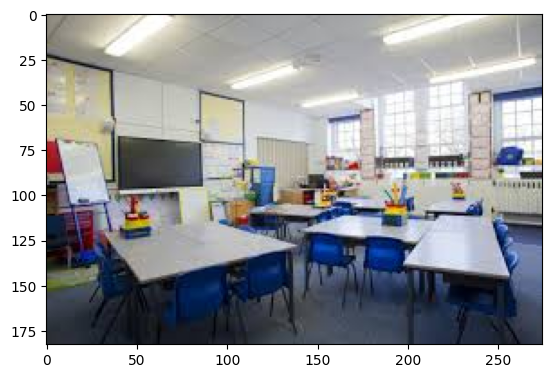

In [7]:
# import random
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# %matplotlib inline

sample = random.choice(light_names)
image = mpimg.imread(path + sample)
plt.imshow(image)
plt.show()

In [8]:
sample = random.choice(light_names)
image = mpimg.imread(path+ sample)
image.shape

(1280, 720, 3)

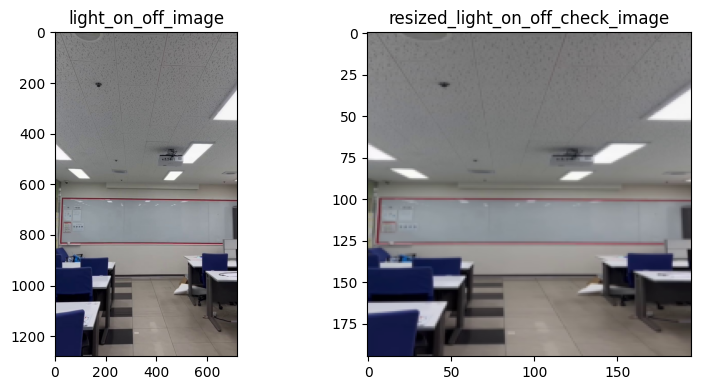

In [9]:
from skimage.transform import resize
resized = resize(image, (195, 195, 3)) #300, 300 크기로 변경

fig, axes = plt.subplots(1, 2, figsize =(8, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap = plt.cm.gray)
ax[0].set_title("light_on_off_image")
ax[1].imshow(resized, cmap =plt.cm.gray)
ax[1].set_title("resized_light_on_off_check_image")

fig.tight_layout()
plt.show()

In [10]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np

images = []
bar_total = tqdm(light_names)
for file in bar_total:
    image = mpimg.imread(path+file)
    images.append(resize(image, (195, 195, 3)))

images = np.array(images)

  0%|          | 0/2169 [00:00<?, ?it/s]

In [28]:
images.shape, light_names[:5]

((2169, 195, 195, 3),
 ['lightOFF.240.jpg',
  'lightOFF.530.jpg',
  'lightON.1073.jpg',
  'lightON.852.jpg',
  'lightOFF.80.jpg'])

In [29]:
images[:3]

array([[[[0.67345734, 0.63652984, 0.62147499],
         [0.67509468, 0.63697647, 0.62583618],
         [0.69123553, 0.65216332, 0.64615404],
         ...,
         [0.54708965, 0.51114174, 0.48183721],
         [0.55052774, 0.51457983, 0.4852753 ],
         [0.55179173, 0.51584382, 0.48653929]],

        [[0.6513041 , 0.61596885, 0.58943329],
         [0.65413532, 0.61843023, 0.59676441],
         [0.67258083, 0.63569691, 0.62068554],
         ...,
         [0.54457306, 0.51667737, 0.49391894],
         [0.5483244 , 0.52042871, 0.49767028],
         [0.50903549, 0.4811398 , 0.45838137]],

        [[0.64019139, 0.60489727, 0.57926039],
         [0.65766312, 0.62236712, 0.59935922],
         [0.65526877, 0.61990656, 0.59993366],
         ...,
         [0.54403466, 0.5173993 , 0.50345641],
         [0.51190095, 0.48526558, 0.4713227 ],
         [0.46888711, 0.44225175, 0.42830886]],

        ...,

        [[0.34397941, 0.33622519, 0.35022273],
         [0.32691811, 0.31916442, 0.3319089 ]

In [30]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(on_off_labels)
light_on_off_labels_encoded = encoder.transform(on_off_labels)
light_on_off_labels_encoded[:3], encoder.classes_

(array([0, 0, 1]), array(['lightOFF', 'lightON'], dtype='<U8'))

In [31]:
# 1.12 데이터 나누고

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test =\
                train_test_split(images, light_on_off_labels_encoded, test_size =0.2,
                                 random_state = 13, stratify  = light_on_off_labels_encoded)
X_train.shape, X_test.shape

((1735, 195, 195, 3), (434, 195, 195, 3))

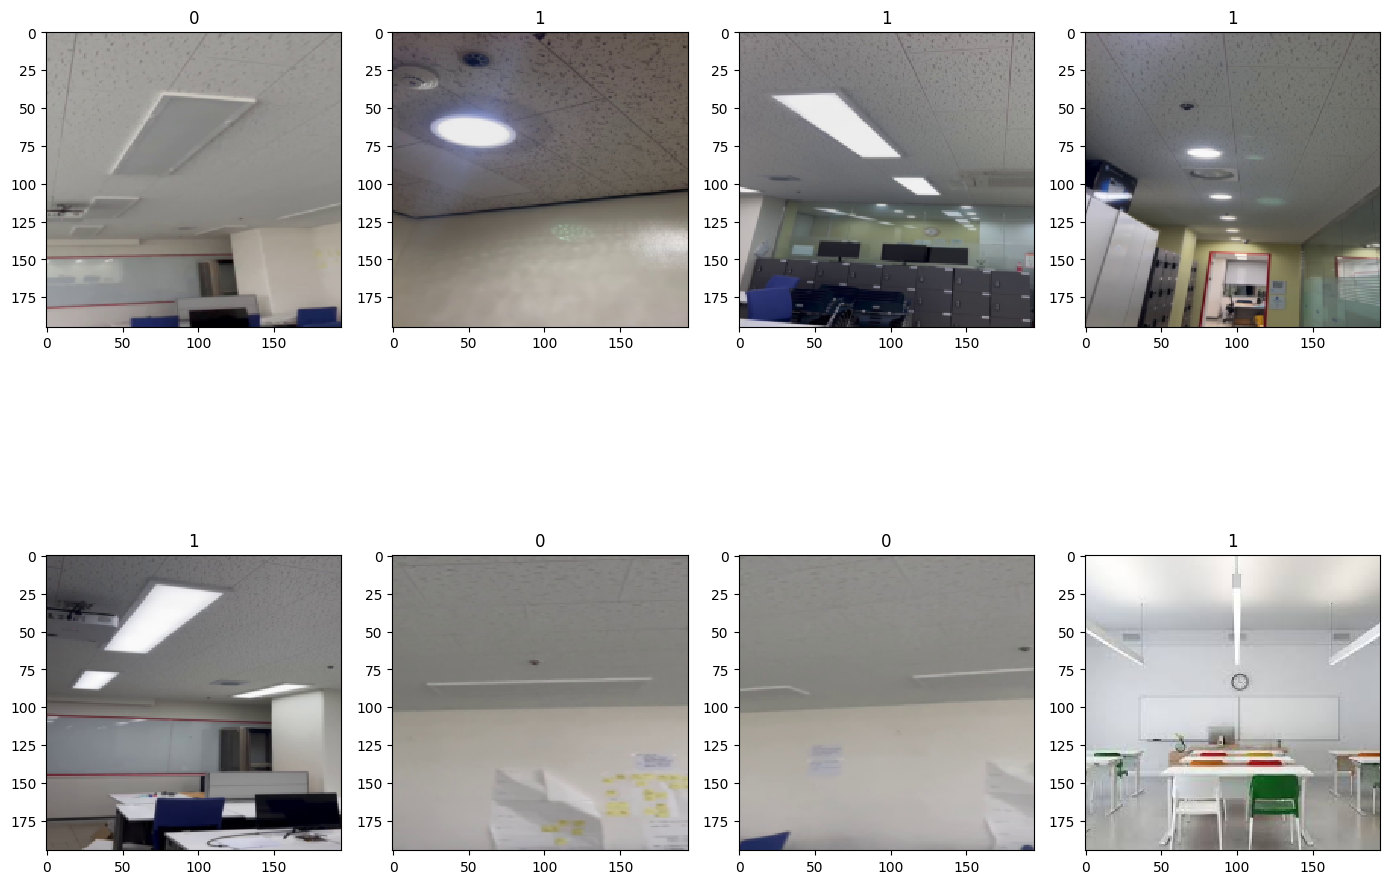

In [16]:
samples = random.choices(population = range(0, 244), k =8 )

plt.figure(figsize =(14,12))
for idx, n in enumerate(samples):
    plt.subplot(2, 4, idx+1)
    plt.imshow(X_train[n], cmap ='Greys',interpolation = 'nearest')
    plt.title(y_train[n])

plt.tight_layout()
plt.show()

In [33]:
from tensorflow.keras import layers, models

model = models.Sequential([layers.Conv2D(32,(3,3), activation ='relu', input_shape=(195,195,3)),
                           layers.MaxPooling2D(pool_size=(2,2), strides =(2,2)),
                           layers.Dropout(0.25),
                           
                           layers.Conv2D(64,(3,3), activation='relu',padding ='same'),
                           layers.MaxPooling2D(pool_size=(2,2)),
                           layers.Dropout(0.25),

                           layers.Conv2D(64,(3,3), activation='relu',padding ='same'),
                           layers.MaxPooling2D(pool_size=(2,2)),
                           layers.Dropout(0.25),
                           
                           layers.Flatten(),
                           layers.Dense(512, activation ='relu'),
                           layers.Dropout(0.25),
                           layers.Dense(2, activation ='softmax')])



model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 193, 193, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 96, 96, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 96, 96, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 48, 48, 64)       

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
import time

start_time = time.time()
hist = model.fit(X_train.reshape(1735, 195, 195, 3), y_train,
                 epochs = 10, verbose =1, #처음 5번
                 validation_data = (X_test.reshape(434, 195, 195, 3), y_test))
print("fit time :", time.time() - start_time)

: 

In [20]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

14/14 [==============================] - 0s 11ms/step - loss: 0.0803 - accuracy: 0.9839
Test loss : 0.08027680218219757
Test accuracy : 0.9838709831237793


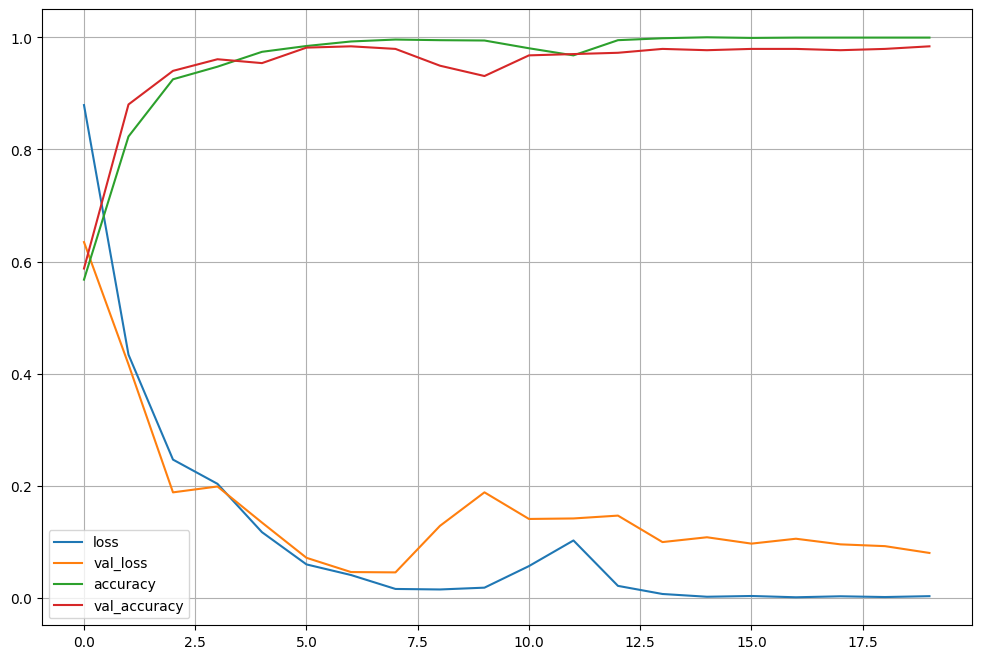

In [21]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()
plt.grid()
plt.show()

In [22]:
import matplotlib
print(matplotlib.__version__)

3.8.1


In [23]:
import numpy as np
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

14/14 [==============================] - 0s 10ms/step


array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [24]:
wrong_result =[]

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
len(wrong_result)

7

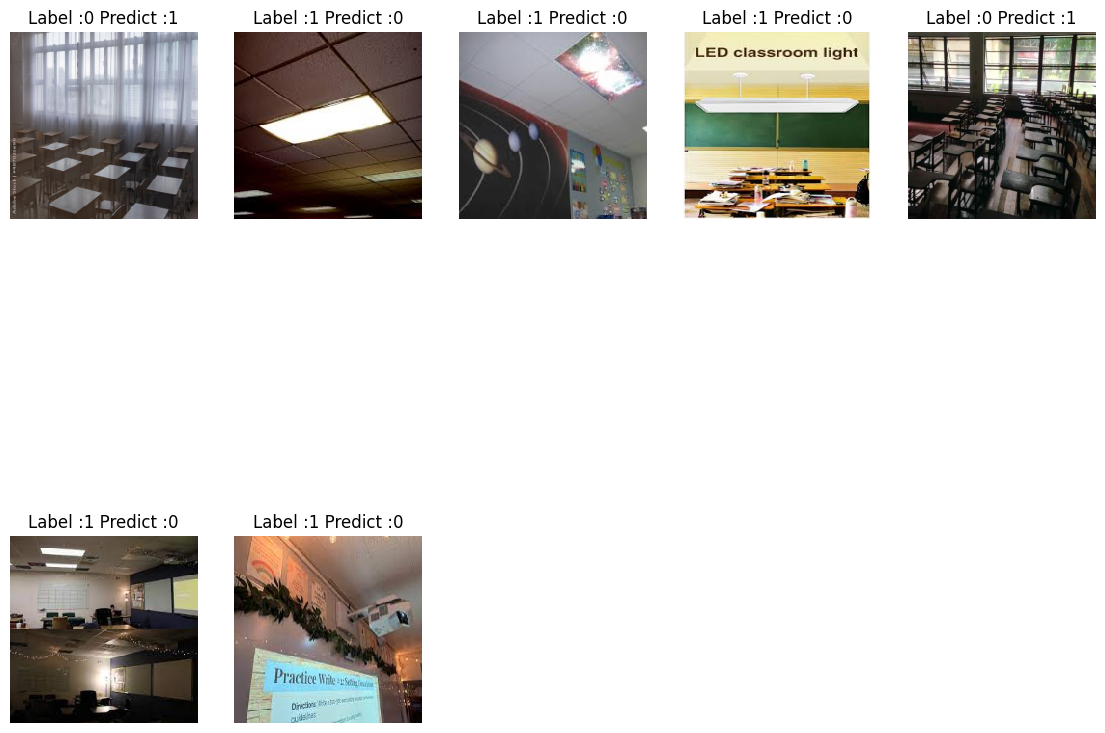

In [25]:
plt.figure(figsize =(14,12))

for idx, n in enumerate(wrong_result):
    plt.subplot(2, 5, idx +1)
    plt.imshow(X_test[n], cmap='Greys', interpolation='nearest')
    plt.title('Label :' + str(y_test[n])+ ' Predict :' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()
    

In [26]:
model.save('light_on_off_model')

INFO:tensorflow:Assets written to: light_on_off_model/assets


INFO:tensorflow:Assets written to: light_on_off_model/assets


In [27]:
model.save('light_on_off_model.keras')